#  BM20A6100 Advanced Data Analysis and Machine Learning
## Erik Kuitunen, 0537275

### Task 1
Visualize the data

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

df = pd.read_csv("winequality-red.csv")
col_names = list( df.columns )
#df_features = df.drop( "quality", axis =1 )     

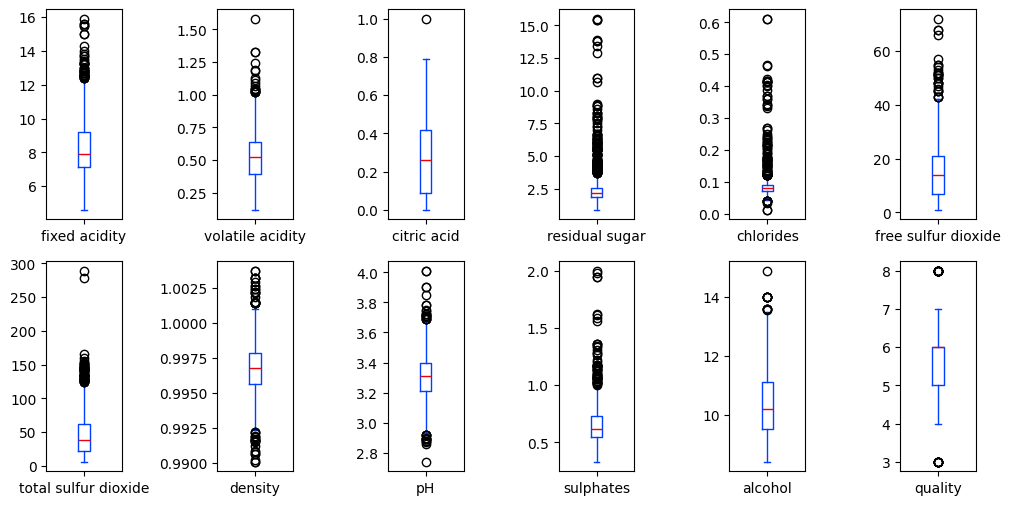

In [51]:
# Drawing boxplots of features
bp = df.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    layout = (2, 6),
    figsize = (12, 6),
)

# Increase spacing between subplots
plt.subplots_adjust(wspace=1.25) 
plt.show()


### Task 2
Scale and center the dataset. Re-visualize the variable boxplots.

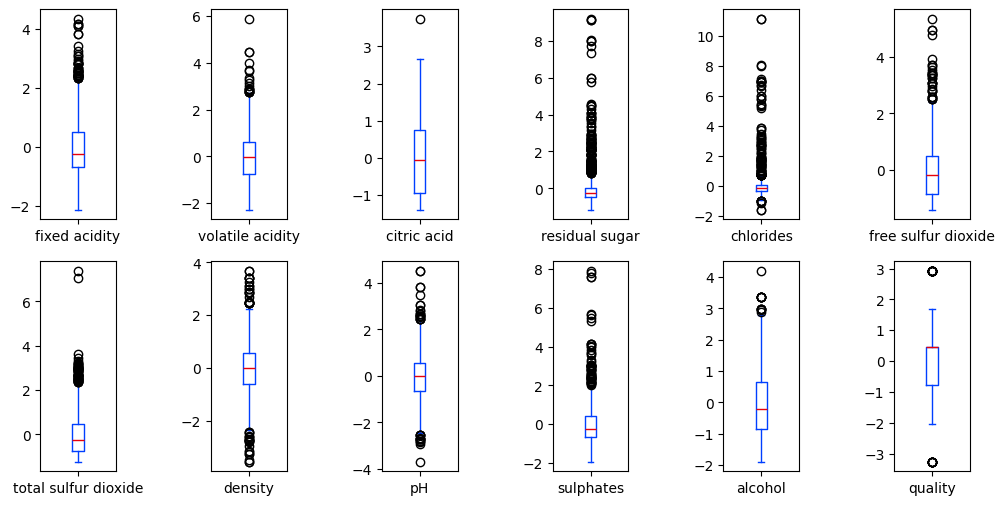

In [52]:
feature_means = df.mean( axis = 0 )
feature_std = df.std( axis=0 )
# feature_mins = df_features.min( axis = 0 )
# feature_maxs = df_features.max( axis = 0 )

df_scaled = ( df - feature_means ) / feature_std

boxplot_scaled = df_scaled.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    layout = (2, 6),
    figsize = (12, 6),
)

# Increase spacing between subplots
plt.subplots_adjust(wspace=1.25) 
plt.show()

### Task 3
Apply PCA on the model. Treat all variables as independent (input) variables.

In [53]:
x = df_scaled.loc[ :, col_names ].values
# y = df_scaled.loc[ :, col_names[-1]].values

pca_all = PCA().fit(x)
pca_all_data = pca_all.transform(x)

pca_cols = [f"PC{i}" for i in range(1, pca_all_data.shape[1] + 1)]
pca_all_df = pd.DataFrame( pca_all_data, columns = pca_cols)

pca_all_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.778885,-1.156941,-1.386147,-0.044930,0.233811,0.976677,0.110493,-0.040307,0.294328,0.073089,-0.262854,0.048347
1,-1.003871,-2.071190,0.007756,0.465974,0.182397,-0.657569,1.376359,0.176659,-0.587158,-0.565559,0.048768,-0.139522
2,-0.915497,-1.392998,-0.699068,0.345184,0.095180,-0.254743,0.720113,0.088659,-0.546324,-0.162014,-0.199078,-0.120353
3,2.403325,0.213725,0.066360,-0.888904,-1.524265,0.132176,-0.200597,0.202752,0.506053,0.241059,-0.107582,0.319664
4,-1.778885,-1.156941,-1.386147,-0.044930,0.233811,0.976677,0.110493,-0.040307,0.294328,0.073089,-0.262854,0.048347
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.241290,-0.599407,0.795579,0.440921,-0.312883,-0.130779,-0.291835,-0.137369,0.421685,-1.016525,0.312669,-0.058902
1595,-2.121792,0.369985,2.137870,0.454422,0.104092,0.750993,0.436712,-0.181482,0.413723,-0.991826,0.464881,-0.240857
1596,-1.365838,0.517399,1.250305,0.514344,0.195854,0.551989,0.195978,0.121116,0.107536,-0.752618,0.235193,-0.402166
1597,-2.366406,-0.703325,0.899201,0.661749,0.021373,0.805501,-0.126629,-0.607210,0.378180,-0.723227,0.737023,0.036176


### Task 4
Visualize and comment the variation explained by the model with different no. PCs. Think of an explanation.

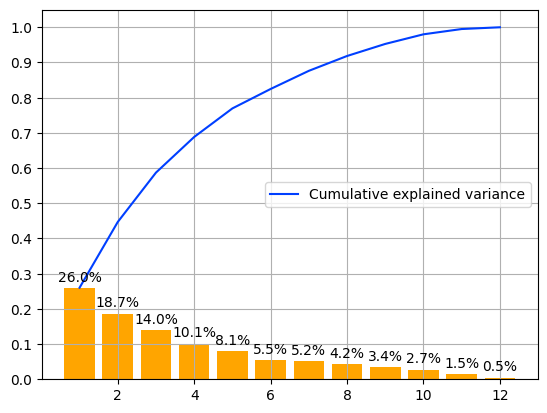

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

In [54]:
explained_variances = pca_all.explained_variance_ratio_
cum_explained_variances = np.cumsum( explained_variances )

pc_nums = np.arange( 1, len(cum_explained_variances )+1 ) 

plt.plot( pc_nums, cum_explained_variances, label = "Cumulative explained variance" )
var_bars = plt.bar( pc_nums, explained_variances, align = "center", linewidth=1.2, color = "orange")

for bar in var_bars:
    percentage = bar.get_height()
    textpos_x = bar.get_x() + bar.get_width() / 2
    textpos_y = percentage + 0.01
    text = str( round( percentage*100, 1 ) ) + "%"
    plt.text( textpos_x, textpos_y, text, ha = "center", va = "bottom")

#plt.title( "Explained variance of components" )
plt.yticks( np.arange( 0, 1.1, step = 0.1 ) )
plt.grid()
plt.legend( loc = 'center right' )

plt.show()

explained_variances


### Task 5
Compute the biplot of the first two principal components and explain covariances on it. Comment the biplot.

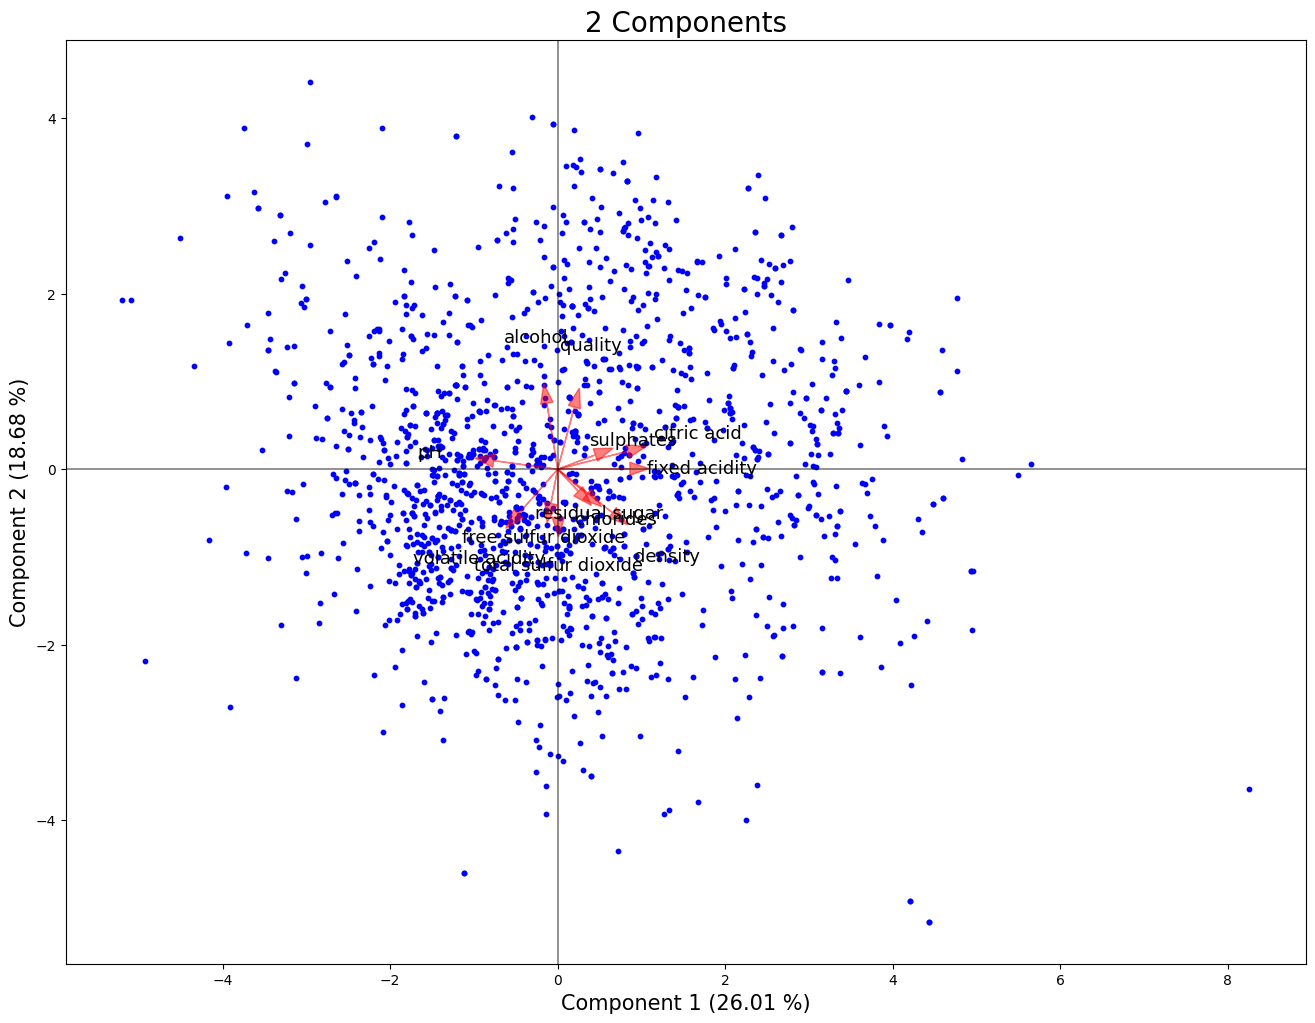

In [66]:
from PyBiPlot import BiPlot

pca_2 = PCA( n_components=2 )
pca_2_data = pca_2.fit_transform(x)

loadings_2comp = pd.DataFrame( pca_2.components_.T * np.sqrt( pca_2.explained_variance_ ), index = col_names )
projected_data_2comp = pd.DataFrame( pca_2_data )
explained_variance_ratio_2comp = pca_2.explained_variance_ratio_
pca_2_data
BiPlot( ProjectedData = projected_data_2comp, 
        Loadings = loadings_2comp, 
        ExplainedVar = list( explained_variance_ratio_2comp), 
        Overlaid = True,
        Sample_size = 10,
        Sample_labels = False,
        Arrow_head_size = 0.15,
        Arrow_labels_shift = 2,
        Arrow_labels_size = 13
        ).plot()